# <span style="color:#57a989">Práctica 4: Clasificación</span>
**Materia:** Introducción a la Ciencia de Datos

**Elaborado por:** Eber David Gaytán Medina.

**Fuente:**

**Objetivo de la practica:**

Realizar una tarea de clasificación para predecir los estados de los vuelos con datos históricos reales.

## <span style="color:#57a989">Indice</span>

[Final](#Final)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_airlines_delay_challenge.csv')

display(df.head(5))
display(df.tail(5))


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0
1,2009-05-08,XE,2926,IAH,ELP,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0
2,2009-03-16,OH,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0
3,2009-03-04,OO,5439,LAX,SBA,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0
4,2009-06-12,WN,615,LAS,MCI,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
8999995,2017-10-27,WN,4233,PDX,SMF,2025.0,2022.0,-3.0,11.0,2033.0,2150.0,-6.0,85.0,479.0
8999996,2017-01-06,OO,4482,SEA,SMF,2105.0,2113.0,8.0,23.0,2136.0,2306.0,7.0,121.0,605.0
8999997,2017-09-24,WN,3997,DEN,SNA,1400.0,1436.0,36.0,11.0,1447.0,1520.0,33.0,140.0,846.0
8999998,2017-07-28,AS,829,SAN,OGG,720.0,720.0,0.0,10.0,730.0,1016.0,-13.0,356.0,2541.0
8999999,2017-04-17,AA,590,SMF,PHX,1620.0,1621.0,1.0,17.0,1638.0,1808.0,-1.0,108.0,647.0


### <span style="color:#57a989">Descripción de los atributos</span>

**FL_DATE:** Fecha del vuelo

**OP_CARRIER:** Identificador de la aerolínea

**OP_CARRIER_FL_NUM:** Número de vuelo

**ORIGIN:** Código del aeropuerto de origen

**DEST:** Código del aeropuerto de destino

**CRS_DEP_TIME:** Hora planeada de salida

**DEP_TIME:** Hora actual de salida

**DEP_DELAY:** Retraso en la salida en minutos

**TAXI_OUT:** El tiempo transcurrido entre la salida desde el aeropuerto de origen y el atributo "WHEELS_OFF"

**WHEELS_OFF:** Hora a la que las llantas del avión dejaron de tocar el suelo

**CRS_ARR_TIME:** Hora planeada de llegada

**ARR_DELAY:** Retraso total en la llegada en minutos (atributo a predecir)

**CRS_ELAPSED_TIME:** Tiempo total planeado del vuelo

**DISTANCE:** Distancia entre los dos aeropuertos


In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000000 entries, 0 to 8999999
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   OP_CARRIER_FL_NUM  int64  
 3   ORIGIN             object 
 4   DEST               object 
 5   CRS_DEP_TIME       float64
 6   DEP_TIME           float64
 7   DEP_DELAY          float64
 8   TAXI_OUT           float64
 9   WHEELS_OFF         float64
 10  CRS_ARR_TIME       float64
 11  ARR_DELAY          float64
 12  CRS_ELAPSED_TIME   float64
 13  DISTANCE           float64
dtypes: float64(9), int64(1), object(4)
memory usage: 961.3+ MB


None

## <span style="color:#57a989">1. Limpieza de Datos</span>

### <span style="color:#57a989">1.1 Limpiar valores atípicos</span>

In [4]:
display(df.isnull().sum())

FL_DATE              0
OP_CARRIER           0
OP_CARRIER_FL_NUM    0
ORIGIN               0
DEST                 0
CRS_DEP_TIME         0
DEP_TIME             0
DEP_DELAY            0
TAXI_OUT             0
WHEELS_OFF           0
CRS_ARR_TIME         0
ARR_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
dtype: int64

In [5]:
display(df.duplicated().sum())

27522

In [6]:
df1 = df.drop_duplicates()

In [7]:
display("Max ",df['ARR_DELAY'].max(),"Min ",df['ARR_DELAY'].min())

'Max '

1795.0

'Min '

-238.0

In [8]:
1795/(60*24)

1.2465277777777777

In [9]:
display(df.nunique())

FL_DATE              3225
OP_CARRIER             21
OP_CARRIER_FL_NUM    7538
ORIGIN                352
DEST                  351
CRS_DEP_TIME         1400
DEP_TIME             1440
DEP_DELAY            1352
TAXI_OUT              230
WHEELS_OFF           1440
CRS_ARR_TIME         1440
ARR_DELAY            1381
CRS_ELAPSED_TIME      649
DISTANCE             1653
dtype: int64

In [10]:
display(df['FL_DATE'])

0          2009-09-05
1          2009-05-08
2          2009-03-16
3          2009-03-04
4          2009-06-12
              ...    
8999995    2017-10-27
8999996    2017-01-06
8999997    2017-09-24
8999998    2017-07-28
8999999    2017-04-17
Name: FL_DATE, Length: 9000000, dtype: object

### <span style="color:#57a989">1.2 Codificar variables categóricas</span>

In [11]:
from sklearn.preprocessing import LabelEncoder
# label_encoders = {}
# for column in df.select_dtypes(include=['object']).columns:
#     le = LabelEncoder()
#     df[column] = le.fit_transform(df[column])
#     label_encoders[column] = le  # Guardar los codificadores por si se necesitan en el futuro

# from sklearn.preprocessing import LabelEncoder

# Supongamos que tu columna de fecha se llama 'DATE_COLUMN'
label_encoders = {}
columns_to_encode = df.select_dtypes(include=['object']).columns.difference(['FL_DATE'])

for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Guardar los codificadores por si se necesitan en el futuro

In [12]:
display(df.head(),df.tail())

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,2009-09-05,1,2062,220,42,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0
1,2009-05-08,19,2926,162,108,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0
2,2009-03-16,13,6433,84,100,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0
3,2009-03-04,14,5439,190,295,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0
4,2009-06-12,18,615,188,209,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
8999995,2017-10-27,18,4233,256,312,2025.0,2022.0,-3.0,11.0,2033.0,2150.0,-6.0,85.0,479.0
8999996,2017-01-06,14,4482,302,312,2105.0,2113.0,8.0,23.0,2136.0,2306.0,7.0,121.0,605.0
8999997,2017-09-24,18,3997,92,314,1400.0,1436.0,36.0,11.0,1447.0,1520.0,33.0,140.0,846.0
8999998,2017-07-28,2,829,293,242,720.0,720.0,0.0,10.0,730.0,1016.0,-13.0,356.0,2541.0
8999999,2017-04-17,1,590,313,261,1620.0,1621.0,1.0,17.0,1638.0,1808.0,-1.0,108.0,647.0


## <span style="color:#57a989">2. Análisis Exploratorio de los Datos</span>

### <span style="color:#57a989">2.1 Distribución y estadística descriptiva</span>

In [13]:
# Obtener la cantidad de datos.

Rows, Columns = df.shape

print("Filas: ",Rows,"\nColumnas: ",Columns)

Filas:  9000000 
Columnas:  14


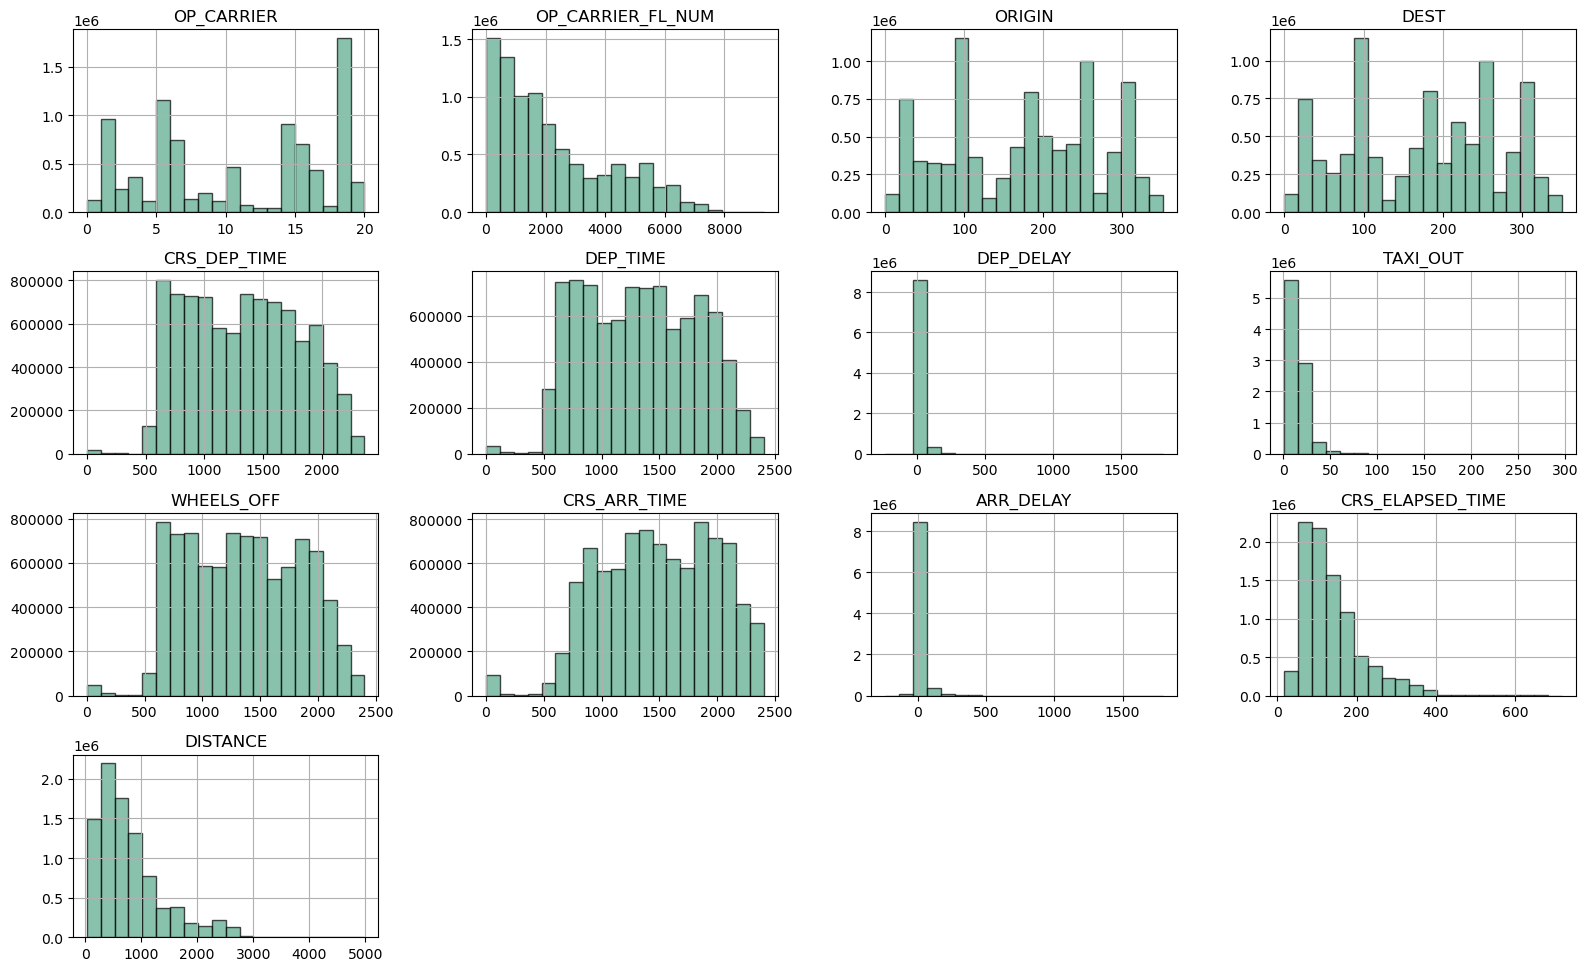

In [14]:
df.hist(bins=20, figsize=(16, 12), color='#57a989', 
        edgecolor='black', alpha=0.7, layout=(5, 4))

plt.tight_layout()  # Ajusta el espaciado para evitar superposiciones
plt.show()

In [15]:
#Breve descripción
display(df.describe())

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
count,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06
mean,1.033594e+01,2.245577e+03,1.743383e+02,1.741246e+02,1.326138e+03,1.332794e+03,8.889274e+00,1.581331e+01,1.355605e+03,1.495601e+03,4.658041e+00,1.368754e+02,7.889871e+02
std,6.361320e+00,1.877307e+03,9.578420e+01,9.554014e+01,4.730146e+02,4.856179e+02,3.604610e+01,9.185871e+00,4.869539e+02,4.932537e+02,3.852880e+01,7.355825e+01,5.947835e+02
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.340000e+02,1.000000e+00,1.000000e+00,1.000000e+00,-2.380000e+02,1.800000e+01,3.100000e+01
25%,5.000000e+00,6.970000e+02,9.200000e+01,9.200000e+01,9.230000e+02,9.250000e+02,-5.000000e+00,1.000000e+01,9.390000e+02,1.115000e+03,-1.300000e+01,8.400000e+01,3.540000e+02
50%,1.000000e+01,1.684000e+03,1.880000e+02,1.880000e+02,1.320000e+03,1.327000e+03,-2.000000e+00,1.400000e+01,1.340000e+03,1.520000e+03,-4.000000e+00,1.180000e+02,6.220000e+02
75%,1.600000e+01,3.467000e+03,2.480000e+02,2.480000e+02,1.725000e+03,1.733000e+03,7.000000e+00,1.800000e+01,1.747000e+03,1.911000e+03,8.000000e+00,1.680000e+02,1.020000e+03
max,2.000000e+01,9.320000e+03,3.510000e+02,3.500000e+02,2.359000e+03,2.400000e+03,1.805000e+03,2.970000e+02,2.400000e+03,2.400000e+03,1.795000e+03,7.180000e+02,4.983000e+03


### <span style="color:#57a989">2.2 Correlaciones</span>

[Text(0.5, 1.0, 'Matriz de correlación')]

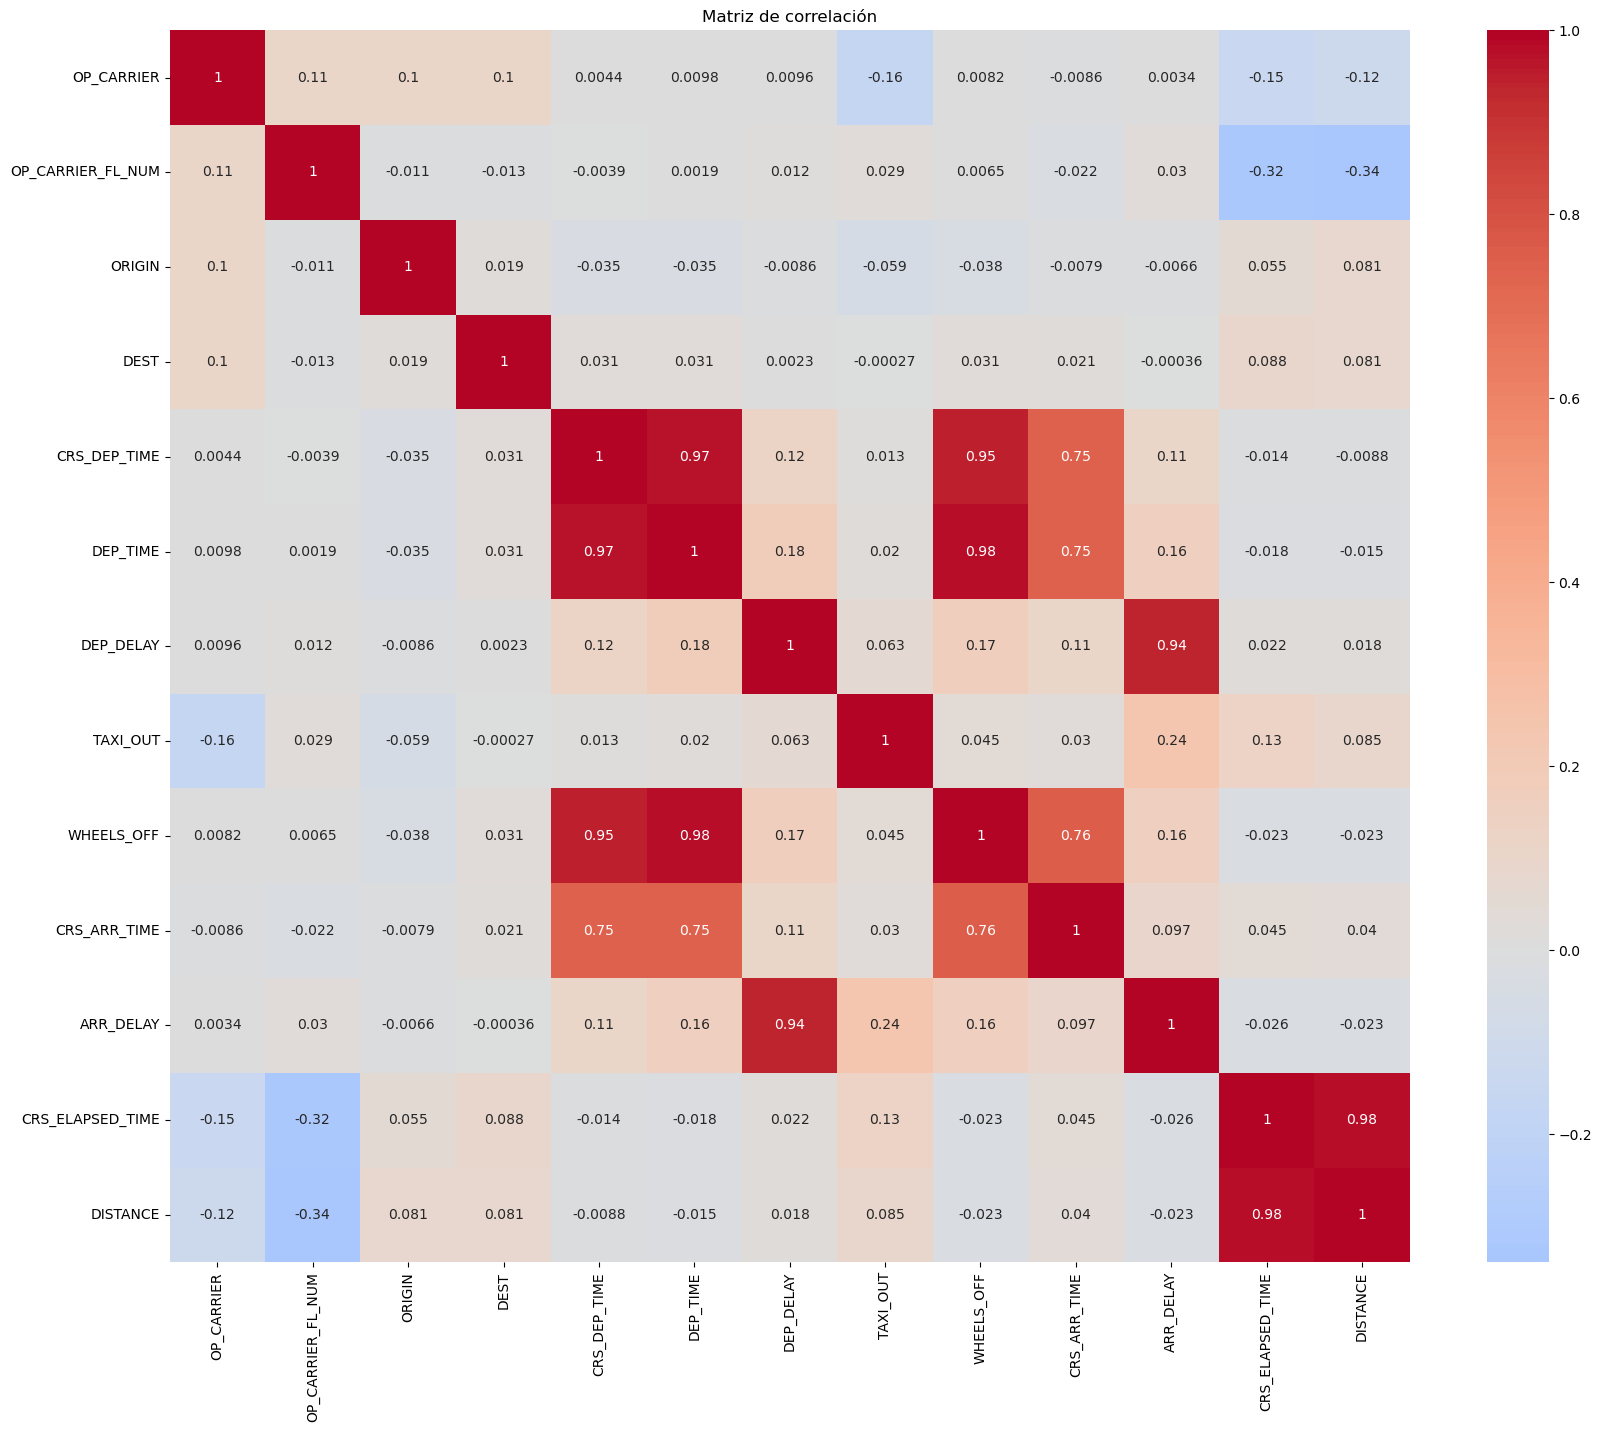

In [16]:
# Crear una matriz de correlación para solo los datos numéricos en primera instancia.
correlation_matrix = df.corr(numeric_only=True)
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(20, 16))  # Ajustar el tamaño de la figura (ancho, alto)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, annot_kws={"fontsize": 10}).set(title="Matriz de correlación")

### <span style="color:#57a989">2.3 Patrones y tendencias</span>

In [17]:
display(df.nunique())

FL_DATE              3225
OP_CARRIER             21
OP_CARRIER_FL_NUM    7538
ORIGIN                352
DEST                  351
CRS_DEP_TIME         1400
DEP_TIME             1440
DEP_DELAY            1352
TAXI_OUT              230
WHEELS_OFF           1440
CRS_ARR_TIME         1440
ARR_DELAY            1381
CRS_ELAPSED_TIME      649
DISTANCE             1653
dtype: int64

##### <span style="color:#57a989">**Observaciones**</span>

1. Se puede observar que hay una baja correlación entre la fecha de vuelo, el identificador de aerolínea, los códigos de origen y destino y el tiempo total planeado de vuelo con el retraso total. Estos atributos podrían ser de interés una vez transformados.

## <span style="color:#57a989">3. Procesamiento de Datos</span>

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### <span style="color:#57a989">3.1 Transformación de Datos</span>

In [19]:
df1 = df.copy()
# Asignar 0 a los valores entre -15 y 15
df1.loc[(df1['ARR_DELAY'] >= -15) & (df1['ARR_DELAY'] <= 15), 'ARR_DELAY'] = 0

# Asignar 1 a los valores menores a -15
df1.loc[df1['ARR_DELAY'] < -15, 'ARR_DELAY'] = 1

# Asignar 2 a los valores mayores a 15
df1.loc[df1['ARR_DELAY'] > 15, 'ARR_DELAY'] = 2


In [20]:
# Con esto nos aseguramos de que FL_DATE este en formato de fecha
df1['FL_DATE'] = pd.to_datetime(df1['FL_DATE'])

# Extraer el mes y agregarlo como una nueva columna
df1['MONTH'] = df1['FL_DATE'].dt.month

In [21]:
df1['RUTE'] = df1['ORIGIN'].astype(str) + df1['DEST'].astype(str)

display(df1['RUTE'])
display(df1['RUTE'].nunique())

df1['RUTE'] = le.fit_transform(df1['RUTE'])


0           22042
1          162108
2           84100
3          190295
4          188209
            ...  
8999995    256312
8999996    302312
8999997     92314
8999998    293242
8999999    313261
Name: RUTE, Length: 9000000, dtype: object

6102

In [22]:
display(df1['RUTE'])

0          2353
1           881
2          5521
3          1486
4          1361
           ... 
8999995    3229
8999996    4020
8999997    5888
8999998    3823
8999999    4355
Name: RUTE, Length: 9000000, dtype: int64

### <span style="color:#57a989">3.2 Obtención de muestra</span>

In [23]:
df_sample = df1.sample(n=100000, random_state=42)

### <span style="color:#57a989">3.3 Separación de características (X) y variable objetivo (y)</span>

In [24]:
# Separar características (X) y la variable objetivo (y)
X = df1[['CRS_DEP_TIME','DEP_TIME', 'DEP_DELAY','TAXI_OUT','WHEELS_OFF','CRS_ARR_TIME','CRS_ELAPSED_TIME','DISTANCE']]  # Suponi endo que la columna 'target' es la variable a predecir
y = df1['ARR_DELAY']
Xs = df_sample[['CRS_DEP_TIME','DEP_TIME', 'DEP_DELAY','TAXI_OUT','WHEELS_OFF','CRS_ARR_TIME','CRS_ELAPSED_TIME','DISTANCE']]  # Suponiendo que la columna 'target' es la variable a predecir
ys = df_sample['ARR_DELAY']
# X = df1[['MONTH', 'CRS_DEP_TIME', 'DISTANCE', 'DEP_DELAY', 'CRS_ELAPSED_TIME','OP_CARRIER_FL_NUM','TAXI_OUT','WHEELS_OFF','CRS_ARR_TIME']]  # Suponiendo que la columna 'target' es la variable a predecir
# y = df1['ARR_DELAY']
ys = ys.astype(int)
display(set(ys))

{0, 1, 2}

### <span style="color:#57a989">3.4 Normalización y estandarización de datos</span>

In [25]:
# Datos escalados
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X)

Xs_standardized = scaler_standard.fit_transform(Xs)

In [26]:
# Normalizar los datos (opcional, dependiendo del algoritmo)
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X)
Xs_normalized = scaler_minmax.fit_transform(Xs)

In [27]:
display(df1.nunique())

FL_DATE              3225
OP_CARRIER             21
OP_CARRIER_FL_NUM    7538
ORIGIN                352
DEST                  351
CRS_DEP_TIME         1400
DEP_TIME             1440
DEP_DELAY            1352
TAXI_OUT              230
WHEELS_OFF           1440
CRS_ARR_TIME         1440
ARR_DELAY               3
CRS_ELAPSED_TIME      649
DISTANCE             1653
MONTH                  12
RUTE                 6102
dtype: int64

## <span style="color:#57a989">4. Extracción y Selección de Características </span>

### <span style="color:#57a989">4.1 Evitar sobre ajuste y mejorar rendimiento</span>

In [36]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=40)
Xs_tsne_redu = tsne.fit_transform(Xs)

In [28]:
scatter = plt.scatter(Xs_tsne_redu[:,0], Xs_tsne_redu[:,1], c=ys)
plt.title('t-SNE plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

NameError: name 'Xs_tsne_redu' is not defined

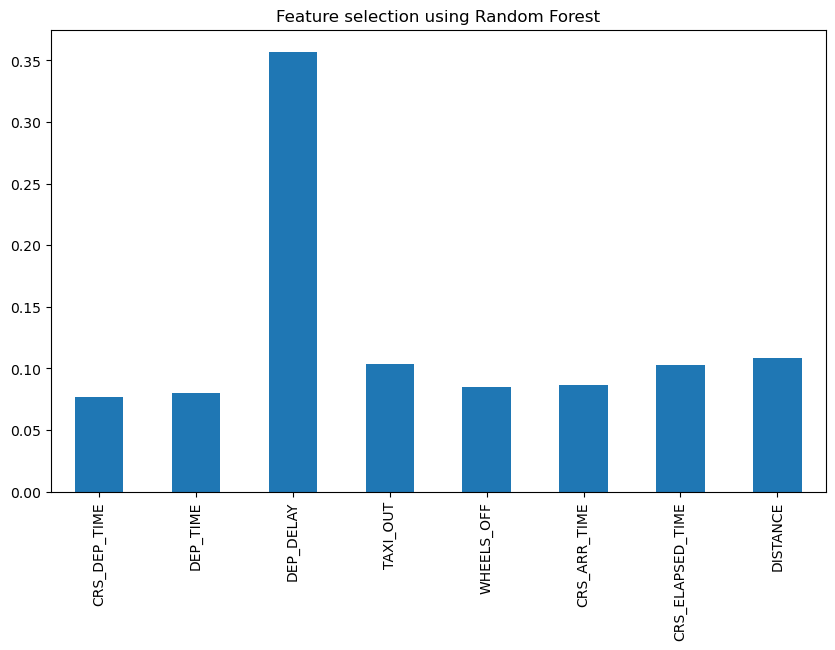

Execution time: 35.43 seconds


In [29]:
# Usar random forest para generar caracteristicas.
from sklearn.ensemble import RandomForestClassifier
import time

# start time
start_time_forward = time.time()

### Applying feature selection method
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(Xs, ys)

# show feature selection
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=Xs.columns)

plt.figure(figsize=(10, 6))
forest_importances.plot(kind='bar')
plt.title('Feature selection using Random Forest')
plt.show()

end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward
# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

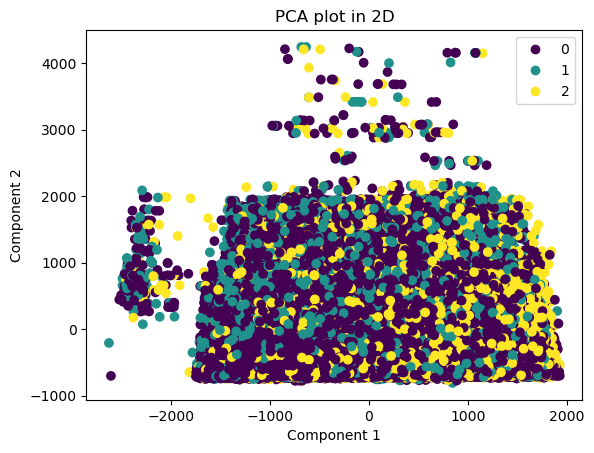

In [30]:
from sklearn.decomposition import PCA
#Usar PCA 
Xs_PCA = PCA(n_components=2).fit_transform(Xs)

scatter = plt.scatter(Xs_PCA[:,0], Xs_PCA[:,1], c=ys)
plt.title('PCA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

## <span style="color:#57a989">5. Reducción de Dimensionalidad</span>

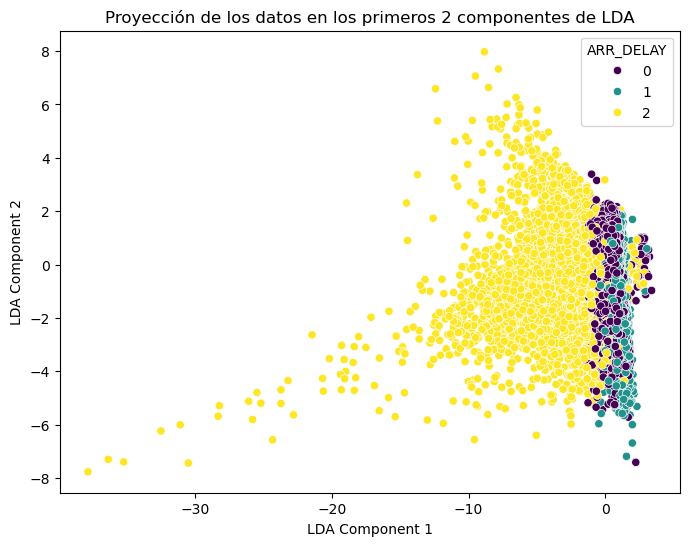

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
Xs_reduc = lda.fit_transform(Xs, ys)
#X_reduc = lda.fit_transform(X,y)

plt.figure(figsize=(8,6))
sns.scatterplot(x=Xs_reduc[:, 0], y=Xs_reduc[:, 1], hue=ys, palette='viridis')
plt.title('Proyección de los datos en los primeros 2 componentes de LDA')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

## <span style="color:#57a989">6. Evaluación con Algoritmos de Inferencia</span>

In [32]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, recall_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [33]:
def sensitivity(y_true, y_pred):
    return recall_score(y_true, y_pred, average='macro')

def specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp)

# Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### <span style="color:#57a989">6.1 Modelo C4.5 </span>
El algoritmo C4.5 no requiere explícitamente que los datos estén normalizados o escalados antes de entrenar el modelo. Esto se debe a la naturaleza del algoritmo, que toma decisiones basadas en la ganancia de información (o reducción de entropía) al dividir los datos, y no se ve afectado por las magnitudes o escalas de las características como lo estarían otros algoritmos (como el SVM o el k-NN).


Evaluando modelo: C4.5 (sklearn version)


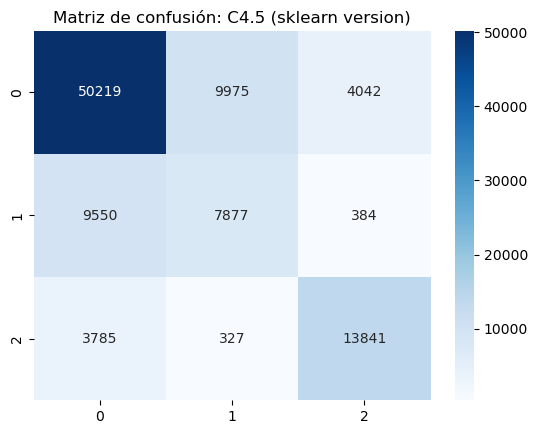

F1-score (macro): 0.6627
Exactitud: 0.7194
Sensibilidad: 0.6650
Especificidad: 0.8343




In [34]:
# Evaluar modelos con cross_val_predict

clf_C45 = DecisionTreeClassifier(criterion='entropy', random_state=42)

print("\nEvaluando modelo: C4.5 (sklearn version)")
    
# Validación cruzada
y_predC45 = cross_val_predict(clf_C45, Xs, ys, cv=cv)
    
# Matriz de confusión
cm = confusion_matrix(ys, y_predC45)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Matriz de confusión: C4.5 (sklearn version)")
plt.show()

# Métricas
f1_macro = f1_score(ys, y_predC45, average='macro')
sens = sensitivity(ys, y_predC45)
spec = specificity(ys, y_predC45)
accuracy = accuracy_score(ys, y_predC45)

print(f"F1-score (macro): {f1_macro:.4f}")
print(f"Exactitud: {accuracy:.4f}")
print(f"Sensibilidad: {sens:.4f}")
print(f"Especificidad: {spec:.4f}")
print("\n")

### <span style="color:#57a989">6.2 Modelo Gaussian Naive Bayes </span>
+ Naive Bayes no necesita que los datos estén normalizados o estandarizados. La razón principal es que utiliza probabilidades y frecuencias, por lo que el escalado de las características no afecta su rendimiento.  
+ Si usas Naive Bayes con características numéricas, el algoritmo calculará la probabilidad de que una característica tenga un cierto valor, independientemente de la magnitud de ese valor.  
+ En el caso de características categóricas, Naive Bayes calcula las probabilidades de cada categoría directamente a partir de las frecuencias, por lo que no tiene sentido normalizar esas características.

https://chat.openai.com/


Evaluando modelo: Gaussian Naive Bayes


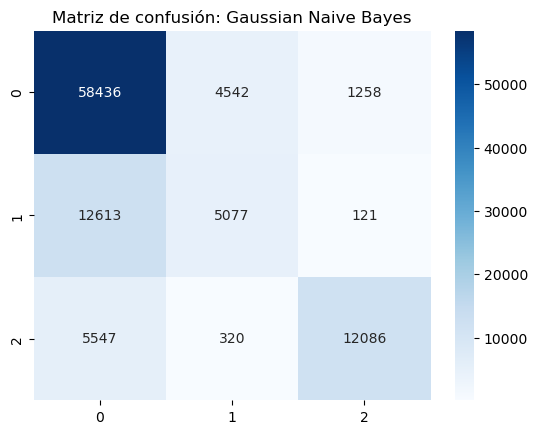

F1-score (macro): 0.6550
Exactitud: 0.7560
Sensibilidad: 0.6227
Especificidad: 0.9279




In [35]:
# Evaluar modelos con cross_val_predict

clf_GNB = GaussianNB()

print("\nEvaluando modelo: Gaussian Naive Bayes")
    
# Validación cruzada
y_predGNB = cross_val_predict(clf_GNB, Xs_reduc, ys, cv=cv)
    
# Matriz de confusión
cm = confusion_matrix(ys, y_predGNB)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Matriz de confusión: Gaussian Naive Bayes")
plt.show()

# Métricas
f1_macro = f1_score(ys, y_predGNB, average='macro')
sens = sensitivity(ys, y_predGNB)
spec = specificity(ys, y_predGNB)
accuracy = accuracy_score(ys, y_predGNB)

print(f"F1-score (macro): {f1_macro:.4f}")
print(f"Exactitud: {accuracy:.4f}")
print(f"Sensibilidad: {sens:.4f}")
print(f"Especificidad: {spec:.4f}")
print("\n")

##### <span style="color:#57a989">**Observaciones**</span>  
Usar el conjunto reducido por LDA aumenta la exactitud y el F1-score, podría ser interesante probarlo con otros modelos para selección.

### <span style="color:#57a989">6.3 Modelo K-Nearest Neighbors </span>

+ Sensibilidad a la escala: El algoritmo k-NN calcula la distancia entre los puntos (normalmente usando la distancia euclidiana). Si las características tienen escalas diferentes (por ejemplo, una característica puede estar en el rango de 0 a 1 y otra en el rango de 0 a 1000), las características con mayores magnitudes dominarán la distancia, lo que puede llevar a resultados engañosos.  
+ Estandarización (z-score normalization): Transforma los datos para que tengan una media de 0 y una desviación estándar de 1.  
+ Normalización (min-max scaling): Escala los datos para que estén en un rango específico, comúnmente entre 0 y 1.


https://chat.openai.com/

In [36]:
Xs_std_reduc = lda.fit_transform(Xs_standardized, ys)

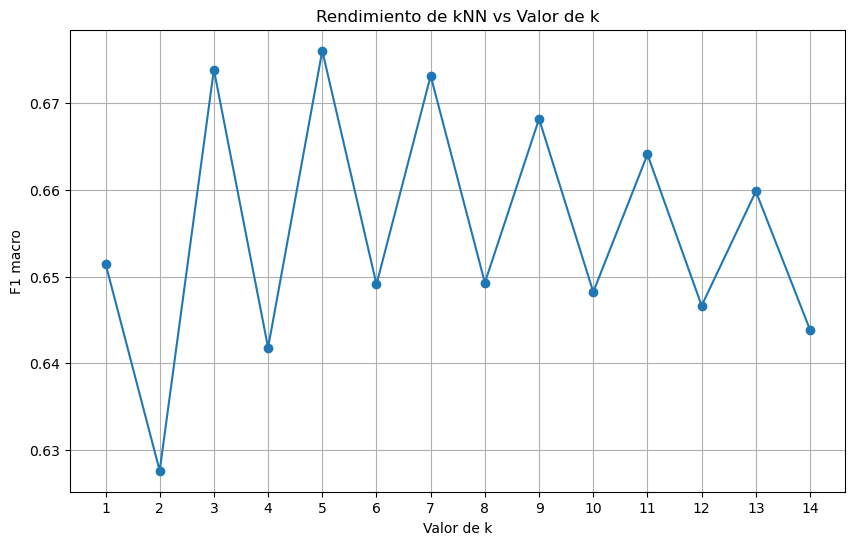

El mejor valor de k es: 5 con un F1-macro de 0.6760


In [38]:
k_values = range(1, 15)  # Probar k de 1 a 20
f1_macros = []

for k in k_values:
    # Inicializar el modelo kNN
    clf_kNN = KNeighborsClassifier(n_neighbors=k)
    y_predkNN = cross_val_predict(clf_kNN, Xs_standardized, ys, cv=5) # Entrenar el modelo
    f1_macro = f1_score(ys, y_predkNN, average='macro')  # Calcular exactitud
    f1_macros.append(f1_macro)  # Almacenar el rendimiento

# 4. Graficar el rendimiento contra el valor de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_macros, marker='o')
plt.title('Rendimiento de kNN vs Valor de k')
plt.xlabel('Valor de k')
plt.ylabel('F1 macro')
plt.xticks(k_values)
plt.grid()
plt.show()

# Imprimir el mejor valor de k
best_k = k_values[np.argmax(f1_macros)]
print(f'El mejor valor de k es: {best_k} con un F1-macro de {max(f1_macros):.4f}')

Una vez definida **la mejor k**, esta será usada para entrenar al modelo que mostrara los datos de confusion matriz, accuracy_score, specificity y sensitivity.


Evaluando modelo: k Nearest Neighbors


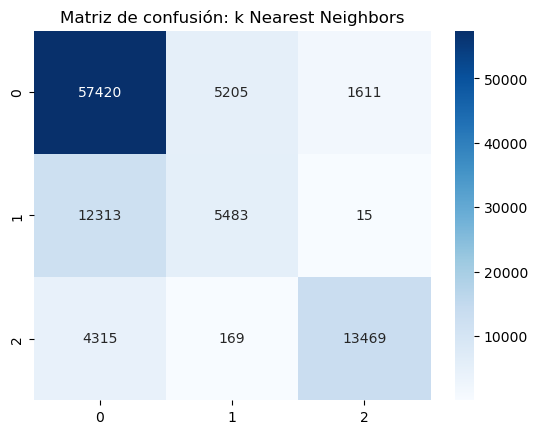

F1-score (macro): 0.6760
Exactitud: 0.7637
Sensibilidad: 0.6507
Especificidad: 0.9169




In [39]:
print("\nEvaluando modelo: k Nearest Neighbors")
k=best_k
clf_kNN = KNeighborsClassifier(n_neighbors=k)

# Validación cruzada
y_predkNN = cross_val_predict(clf_kNN, Xs_standardized, ys, cv=5)
    
# Matriz de confusión
cm = confusion_matrix(ys, y_predkNN)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión: k Nearest Neighbors")
plt.show()

# Métricas
f1_macro = f1_score(ys, y_predkNN, average='macro')
sens = sensitivity(ys, y_predkNN)
spec = specificity(ys, y_predkNN)
accuracy = accuracy_score(ys, y_predkNN)

print(f"F1-score (macro): {f1_macro:.4f}")
print(f"Exactitud: {accuracy:.4f}")
print(f"Sensibilidad: {sens:.4f}")
print(f"Especificidad: {spec:.4f}")
print("\n")

### <span style="color:#57a989">6.4 Modelo Support Vector Machines </span>

+ Sensibilidad a la escala: SVM es un algoritmo basado en la maximización de los márgenes entre las clases, lo cual involucra cálculos de distancia en el espacio de características. Si las características tienen rangos diferentes (por ejemplo, una característica varía entre 0 y 1 y otra entre 0 y 1000), la característica con mayor rango dominará el cálculo de las distancias, lo que puede afectar la clasificación.
+ Estandarización: Los datos se transforman para que tengan una media de 0 y una desviación estándar de 1. Es ideal para SVM ya que mantiene la estructura de las relaciones entre las características

https://chat.openai.com/

[LibLinear]

iter  1 act 7.127e+03 pre 6.188e+03 delta 3.117e-01 f 5.528e+04 |g| 5.038e+04 CG   3
cg reaches trust region boundary
iter  2 act 1.742e+03 pre 1.471e+03 delta 3.998e-01 f 4.815e+04 |g| 1.182e+04 CG   4
cg reaches trust region boundary
iter  3 act 7.504e+02 pre 7.000e+02 delta 5.105e-01 f 4.641e+04 |g| 6.011e+03 CG   5
cg reaches trust region boundary
iter  4 act 3.579e+02 pre 3.572e+02 delta 5.957e-01 f 4.566e+04 |g| 3.194e+03 CG   5
iter  5 act 2.989e+01 pre 2.969e+01 delta 5.957e-01 f 4.530e+04 |g| 1.103e+03 CG   7
iter  6 act 9.453e-02 pre 9.365e-02 delta 5.957e-01 f 4.527e+04 |g| 2.845e+01 CG   7
iter  7 act 8.680e-04 pre 8.680e-04 delta 5.957e-01 f 4.527e+04 |g| 2.227e+00 CG   8
iter  1 act 2.651e+04 pre 2.516e+04 delta 5.665e-01 f 9.242e+04 |g| 9.656e+04 CG   3
cg reaches trust region boundary
iter  2 act 6.526e+03 pre 4.782e+03 delta 9.579e-01 f 6.591e+04 |g| 1.835e+04 CG   5
cg reaches trust region boundary
iter  3 act 5.313e+03 pre 4.362e+03 delta 1.333e+00 f 5.938e+04 |g| 1.

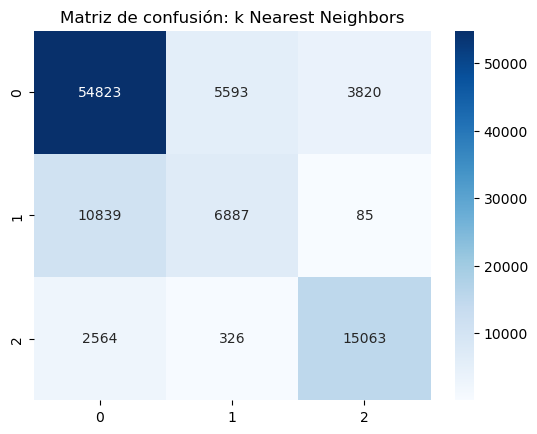

F1-score (macro): 0.6979
Exactitud: 0.7677
Sensibilidad: 0.6931
Especificidad: 0.9074




In [40]:
#clf_SVM = svm.SVC(kernel='poly', class_weight='balanced', verbose=1, max_iter=500)#, max_iter=100
clf_SVM = svm.LinearSVC(class_weight='balanced', verbose=1)

y_predSVM = cross_val_predict(clf_SVM, Xs_standardized, ys, cv=5)
    
# Matriz de confusión
cm = confusion_matrix(ys, y_predSVM)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión: k Nearest Neighbors")
plt.show()

# Métricas
f1_macro = f1_score(ys, y_predSVM, average='macro')
sens = sensitivity(ys, y_predSVM)
spec = specificity(ys, y_predSVM)
accuracy = accuracy_score(ys, y_predSVM)

print(f"F1-score (macro): {f1_macro:.4f}")
print(f"Exactitud: {accuracy:.4f}")
print(f"Sensibilidad: {sens:.4f}")
print(f"Especificidad: {spec:.4f}")
print("\n")

### <span style="color:#57a989">6.5 Gradient Boosting Classifier</span>
+ Gradient Boosting es un algoritmo basado en árboles de decisión, y los árboles de decisión no son sensibles a las diferencias en la escala de las características, por lo tantto no es necesario agregar el dataset estandarizado ni escalado.


Evaluando modelo: Gradient Boosting Classifier


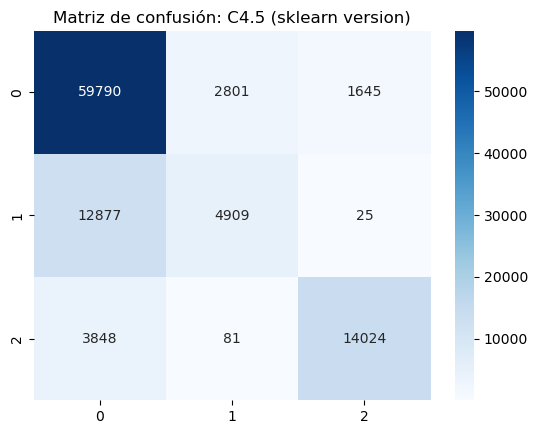

F1-score (macro): 0.6889
Exactitud: 0.7872
Sensibilidad: 0.6625
Especificidad: 0.9552




In [41]:
clf_GBC = GradientBoostingClassifier(n_estimators=100)
print("\nEvaluando modelo: Gradient Boosting Classifier")
    
# Validación cruzada
y_predGBC = cross_val_predict(clf_GBC, Xs, ys, cv=cv)
    
# Matriz de confusión
cm = confusion_matrix(ys, y_predGBC)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Matriz de confusión: C4.5 (sklearn version)")
plt.show()

# Métricas
f1_macro = f1_score(ys, y_predGBC, average='macro')
sens = sensitivity(ys, y_predGBC)
spec = specificity(ys, y_predGBC)
accuracy = accuracy_score(ys, y_predGBC)

print(f"F1-score (macro): {f1_macro:.4f}")
print(f"Exactitud: {accuracy:.4f}")
print(f"Sensibilidad: {sens:.4f}")
print(f"Especificidad: {spec:.4f}")
print("\n")

### <span style="color:#57a989">6.6 Logistic Regression</span>
+ Regresión Logística es un modelo lineal que utiliza una función logística (sigmoidal) para predecir la probabilidad de una clase. Este modelo calcula pesos para cada característica basándose en sus valores. Si las características tienen diferentes rangos o escalas, afectará a los coeficientes de la regresión, ya que las características con rangos mayores tendrán un mayor impacto en los coeficientes.


Evaluando modelo: Logistic Regression


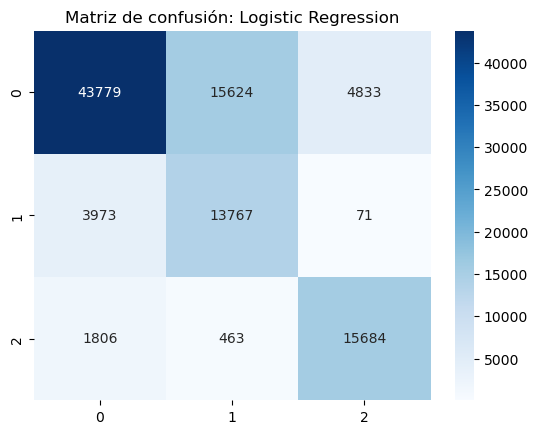

F1-score (macro): 0.7203
Exactitud: 0.7323
Sensibilidad: 0.7760
Especificidad: 0.7370




In [42]:
print("\nEvaluando modelo: Logistic Regression")

clf_LR = LogisticRegression(max_iter=200, class_weight='balanced')
#clf_LR = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)

# Validación cruzada
y_predLR = cross_val_predict(clf_LR, Xs_standardized, ys, cv=5, n_jobs=2)
#y_predLR = cross_val_predict(clf_LR, Xs, ys, cv=5) #Exactitud: 0.7811 | F1-score (macro): 0.6943
    
# Matriz de confusión
cm = confusion_matrix(ys, y_predLR)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión: Logistic Regression")
plt.show()

# Métricas
f1_macro = f1_score(ys, y_predLR, average='macro')
sens = sensitivity(ys, y_predLR)
spec = specificity(ys, y_predLR)
accuracy = accuracy_score(ys, y_predLR)

print(f"F1-score (macro): {f1_macro:.4f}")
print(f"Exactitud: {accuracy:.4f}")
print(f"Sensibilidad: {sens:.4f}")
print(f"Especificidad: {spec:.4f}")
print("\n")

In [43]:
import joblib
joblib.dump(clf_LR, 'Logistic-Regresion-7-1.pkl')

['Logistic-Regresion-7-1.pkl']

### <span style="color:#57a989">6.7 Stochastic Gradient Descent Classifier</span>
+ GEl modelo Stochastic Gradient Descent Classifier (SGDClassifier) requiere que los datos sean escalados o normalizados para funcionar correctamente, ya que es un modelo que se basa en optimización mediante gradientes, y la escala de las características puede afectar significativamente el rendimiento del algoritmo.


Evaluando modelo:  Stochastic Gradient Descent Classifier


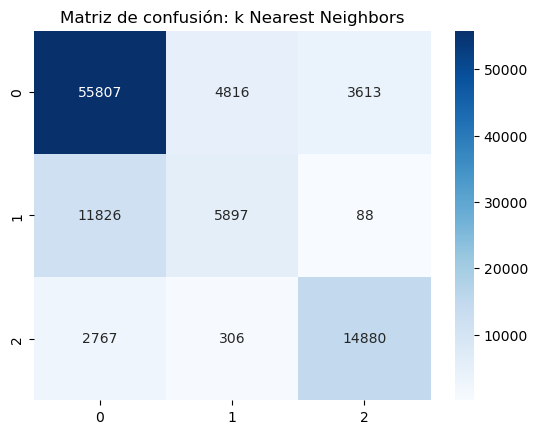

F1-score (macro): 0.6842
Exactitud: 0.7658
Sensibilidad: 0.6762
Especificidad: 0.9206




In [44]:
print("\nEvaluando modelo:  Stochastic Gradient Descent Classifier")

clf_SGDC = SGDClassifier(max_iter=1000, class_weight='balanced')
y_predSGDC = cross_val_predict(clf_SGDC, Xs_standardized, ys, cv=5)
    
# Matriz de confusión
cm = confusion_matrix(ys, y_predSGDC)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión: k Nearest Neighbors")
plt.show()

# Métricas
f1_macro = f1_score(ys, y_predSGDC, average='macro')
sens = sensitivity(ys, y_predSGDC)
spec = specificity(ys, y_predSGDC)
accuracy = accuracy_score(ys, y_predSGDC)

print(f"F1-score (macro): {f1_macro:.4f}")
print(f"Exactitud: {accuracy:.4f}")
print(f"Sensibilidad: {sens:.4f}")
print(f"Especificidad: {spec:.4f}")
print("\n")

### <span style="color:#57a989">6.8 Perceptron</span>
+ El modelo Perceptrón es sensible a la escala de los datos, por lo que requiere estandarización o normalización para obtener un buen rendimiento. Al ser un modelo lineal que actualiza sus pesos con cada iteración basada en los errores de clasificación, la magnitud de las características influye en cómo se ajustan estos pesos. Si las características tienen escalas muy diferentes, el modelo podría enfocarse en las características de mayor escala, ignorando otras importantes.




Evaluando modelo:  Perceptron


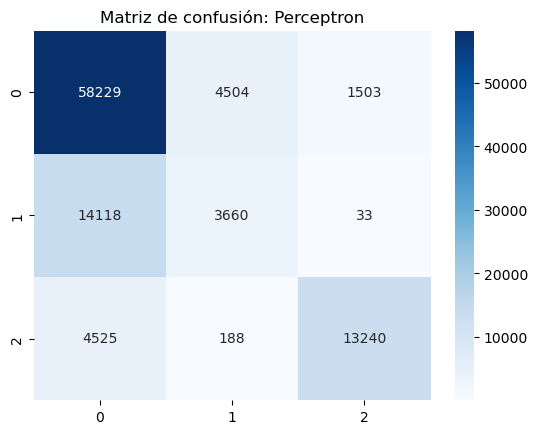

F1-score (macro): 0.6381
Exactitud: 0.7513
Sensibilidad: 0.6165
Especificidad: 0.9282




In [45]:
from sklearn.linear_model import Perceptron


print("\nEvaluando modelo:  Perceptron")

clf_P = Perceptron()
y_predP = cross_val_predict(clf_P, Xs_normalized, ys, cv=5)
    
# Matriz de confusión
cm = confusion_matrix(ys, y_predP)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión: Perceptron")
plt.show()

# Métricas
f1_macro = f1_score(ys, y_predP, average='macro')
sens = sensitivity(ys, y_predP)
spec = specificity(ys, y_predP)
accuracy = accuracy_score(ys, y_predP)

print(f"F1-score (macro): {f1_macro:.4f}")
print(f"Exactitud: {accuracy:.4f}")
print(f"Sensibilidad: {sens:.4f}")
print(f"Especificidad: {spec:.4f}")
print("\n")

### <span style="color:#57a989">6.9 Ridge Classifier</span>
+ El modelo Ridge Classifier, que es una versión de la regresión lineal con regularización L2 para clasificación, sí se beneficia del escalado o la normalización de los datos, especialmente si las características tienen diferentes escalas
+ En este caso el mejor resultado se hizo haciendo uso de la reducción LDA y su estandarización.


Evaluando modelo:  Ridge Classifier


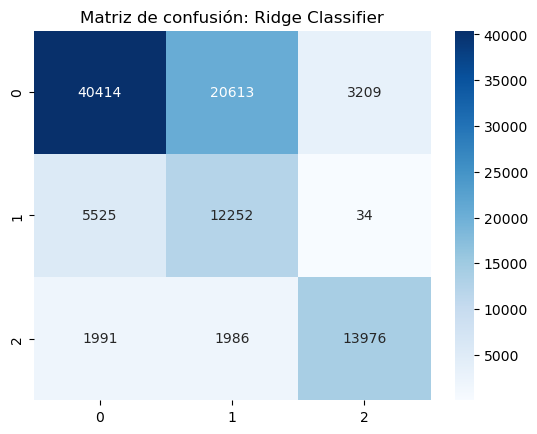

F1-score (macro): 0.6602
Exactitud: 0.6664
Sensibilidad: 0.6985
Especificidad: 0.6622




In [46]:
from sklearn.linear_model import RidgeClassifier 

print("\nEvaluando modelo:  Ridge Classifier")

clf_RC = RidgeClassifier(class_weight='balanced')
y_predRC = cross_val_predict(clf_RC, Xs_reduc, ys, cv=5)
    
# Matriz de confusión
cm = confusion_matrix(ys, y_predRC)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión: Ridge Classifier")
plt.show()

# Métricas
f1_macro = f1_score(ys, y_predRC, average='macro')
sens = sensitivity(ys, y_predRC)
spec = specificity(ys, y_predRC)
accuracy = accuracy_score(ys, y_predRC)

print(f"F1-score (macro): {f1_macro:.4f}")
print(f"Exactitud: {accuracy:.4f}")
print(f"Sensibilidad: {sens:.4f}")
print(f"Especificidad: {spec:.4f}")
print("\n")

### <span style="color:#57a989">6.10 Linear Discriminant Analysis </span>


Evaluando modelo: Linear Discriminant Analysis


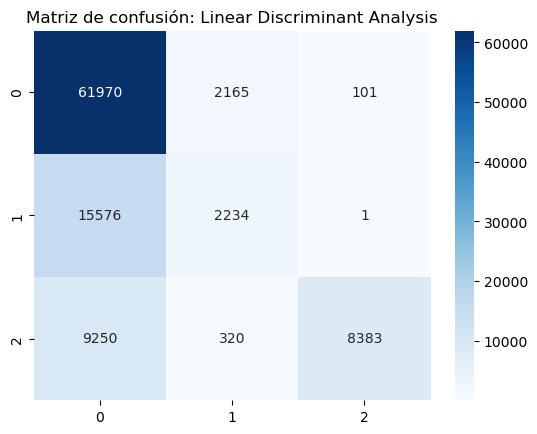

F1-score (macro): 0.5510
Exactitud: 0.7259
Sensibilidad: 0.5190
Especificidad: 0.9662




In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
print("\nEvaluando modelo: Linear Discriminant Analysis")

clf_LDA = LinearDiscriminantAnalysis()
y_predLDA = cross_val_predict(clf_LDA, Xs_standardized, ys, cv=5)
    
# Matriz de confusión
cm = confusion_matrix(ys, y_predLDA)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión: Linear Discriminant Analysis")
plt.show()

# Métricas
f1_macro = f1_score(ys, y_predLDA, average='macro')
sens = sensitivity(ys, y_predLDA)
spec = specificity(ys, y_predLDA)
accuracy = accuracy_score(ys, y_predLDA)

print(f"F1-score (macro): {f1_macro:.4f}")
print(f"Exactitud: {accuracy:.4f}")
print(f"Sensibilidad: {sens:.4f}")
print(f"Especificidad: {spec:.4f}")
print("\n")

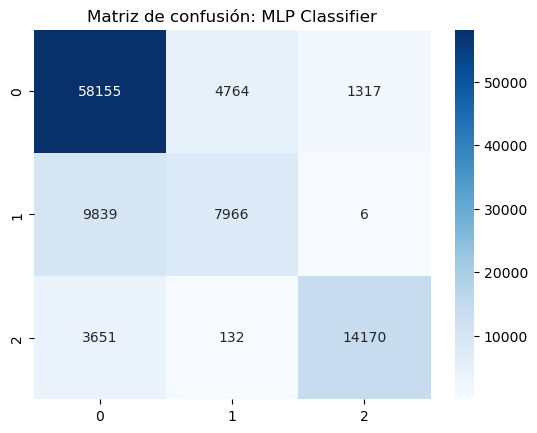

F1-score (macro): 0.7409
Exactitud: 0.8029
Sensibilidad: 0.7140
Especificidad: 0.9243




In [48]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier()
y_predNN = cross_val_predict(NN, Xs_standardized, ys, cv=5)
    
# Matriz de confusión
cm = confusion_matrix(ys, y_predNN)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión: MLP Classifier")
plt.show()

# Métricas
f1_macro = f1_score(ys, y_predNN, average='macro')
sens = sensitivity(ys, y_predNN)
spec = specificity(ys, y_predNN)
accuracy = accuracy_score(ys, y_predNN)

print(f"F1-score (macro): {f1_macro:.4f}")
print(f"Exactitud: {accuracy:.4f}")
print(f"Sensibilidad: {sens:.4f}")
print(f"Especificidad: {spec:.4f}")
print("\n")

[LibSVM].........................................
*..*
optimization finished, #iter = 43705
obj = -28118.503300, rho = -0.107904
nSV = 35793, nBSV = 27258
....................
*..*..*
optimization finished, #iter = 23660
obj = -12913.184668, rho = 1.148154
nSV = 16553, nBSV = 13810
.....*.*
optimization finished, #iter = 6752
obj = -5351.575766, rho = 0.757552
nSV = 3269, nBSV = 2777
Total nSV = 49766
[LibSVM].........................................
*..*
optimization finished, #iter = 43748
obj = -28206.241447, rho = -0.261116
nSV = 35908, nBSV = 27400
....................
*..*..*
optimization finished, #iter = 23909
obj = -12887.904420, rho = 1.153239
nSV = 16507, nBSV = 13795
.....*.*
optimization finished, #iter = 6501
obj = -5294.829763, rho = 0.786625
nSV = 3246, nBSV = 2734
Total nSV = 49849
[LibSVM].........................................
*..*
optimization finished, #iter = 43807
obj = -28139.688011, rho = -0.247435
nSV = 35827, nBSV = 27344
....................
*.*.
*
optimiz

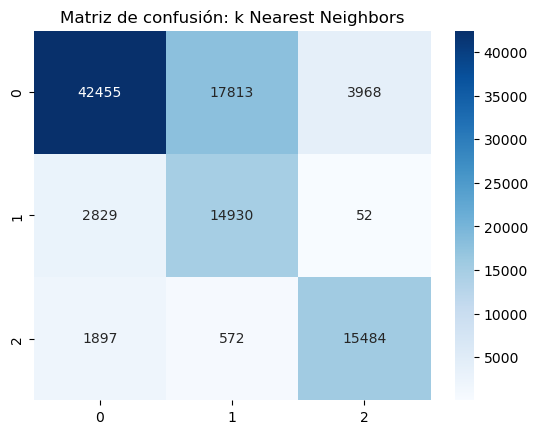

F1-score (macro): 0.7243
Exactitud: 0.7287
Sensibilidad: 0.7872
Especificidad: 0.7044




In [50]:
from sklearn.svm import SVC
clf_SVM = SVC(class_weight='balanced', verbose=1)

y_predSVM = cross_val_predict(clf_SVM, Xs_standardized, ys, cv=5)
    
# Matriz de confusión
cm = confusion_matrix(ys, y_predSVM)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión: k Nearest Neighbors")
plt.show()

# Métricas
f1_macro = f1_score(ys, y_predSVM, average='macro')
sens = sensitivity(ys, y_predSVM)
spec = specificity(ys, y_predSVM)
accuracy = accuracy_score(ys, y_predSVM)

print(f"F1-score (macro): {f1_macro:.4f}")
print(f"Exactitud: {accuracy:.4f}")
print(f"Sensibilidad: {sens:.4f}")
print(f"Especificidad: {spec:.4f}")
print("\n")

## <span style="color:#57a989">7.0 Reportar los Resultados</span>

In [49]:
import joblib
joblib.dump(NN, 'esto-no-es-una-red-neuronal.pkl')

['esto-no-es-una-red-neuronal.pkl']

In [51]:
import joblib
joblib.dump(clf_SVM, 'GALLO-SVM-No-Lineal.pkl')

['GALLO-SVM-No-Lineal.pkl']

## <span style="color:#57a989">8.0 Predicción con el modelo SVM</span>

In [ ]:
df_test = pd_Test.read_csv('test_airlines_delay_challenge') 

df1 = pd_Test.drop_duplicates()

In [ ]:
Mi_Gallo = joblib.load('modelo_inferencia.pkl')
# Ahora puedes usar modelo_cargado para hacer predicciones
y_pred_Gallo = Mi_Gallo.predict(datos_nuevos)

cm = confusion_matrix(ys, y_predNN)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión: MLP Classifier")
plt.show()

# Métricas
f1_macro = f1_score(ys, y_predNN, average='macro')
sens = sensitivity(ys, y_predNN)
spec = specificity(ys, y_predNN)
accuracy = accuracy_score(ys, y_predNN)

print(f"F1-score (macro): {f1_macro:.4f}")
print(f"Exactitud: {accuracy:.4f}")
print(f"Sensibilidad: {sens:.4f}")
print(f"Especificidad: {spec:.4f}")
print("\n")